# Explainability

In this notebook, we explore variables that contribute the most to our models using SHAP in an attempt to improve our explainability. 

In [4]:
import os
import sys
# user defined methods
import sys
sys.path.append('../utils')

from modeling import split_data
import pandas as pd
import shap
from sklearn.linear_model import Ridge

folder_loc = '../../data/processed/cheap_features/'
datasets = os.listdir('../../data/processed/cheap_features/')
target = 'ahi_c0h4'

In [5]:
dataset = 'Ant_Dem_Lif.csv'
# dataset = 'Ant_Cli_Med_Tre.csv'

In [6]:
df = pd.read_csv(folder_loc + dataset)

df.drop(columns=['weight'], inplace=True)

features = df.columns.tolist()
features.remove(target)

# Split data
X_train, X_test, y_train, y_test, X_val, y_val = split_data(df, features, target)

In [7]:
column_rename = {
    'bmi_s1': 'Body Mass Index',
    'height': 'Height',
    'weight20': 'Weight',
    'weight': 'Weight',
    'waist': 'Waist Circumference',
    'neck20': 'Neck Circumference',
    'hip': 'Hip Circumference',
    'coffee15': 'Coffee Intake',
    'tea15': 'Tea Intake',
    'soda15': 'Soda Intake',
    'smknow15': 'Smoking Status Now',
    'evsmok15': 'Smoking Status Ever',
    'smokstat_s1': 'Smoking Status',
    'asa15': 'Aspirin Intake',
    'gender': 'Gender',
    'race': 'Race',
    'age_s1': 'Age',
    'ethnicity': 'Ethnicity',
    'educat': 'Education',
    'mstat': 'Merital Status',
    'age_category_s1': 'Age Category',
}


In [8]:
df = df.rename(columns=column_rename)

In [9]:
# Split data

# X_train, X_test, y_train, y_test, X_val, y_val = split_data(df, features, target)
# rename columns of X_train and X_test
X_train.columns = [column_rename.get(n, n) for n in X_train.columns]# if n in column_rename.keys()]
X_test.columns = [column_rename.get(n, n) for n in X_test.columns]#s if n in column_rename.keys()] 
model = Ridge(random_state=1, solver="sparse_cg")
model.fit(X_train, y_train)

# create an explainer
explainer = shap.LinearExplainer(model, X_train)
# shap_values_test = explainer.shap_values(X_test)
shap_values_test = explainer(X_test)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


<Axes: xlabel='SHAP value (impact on model output)'>

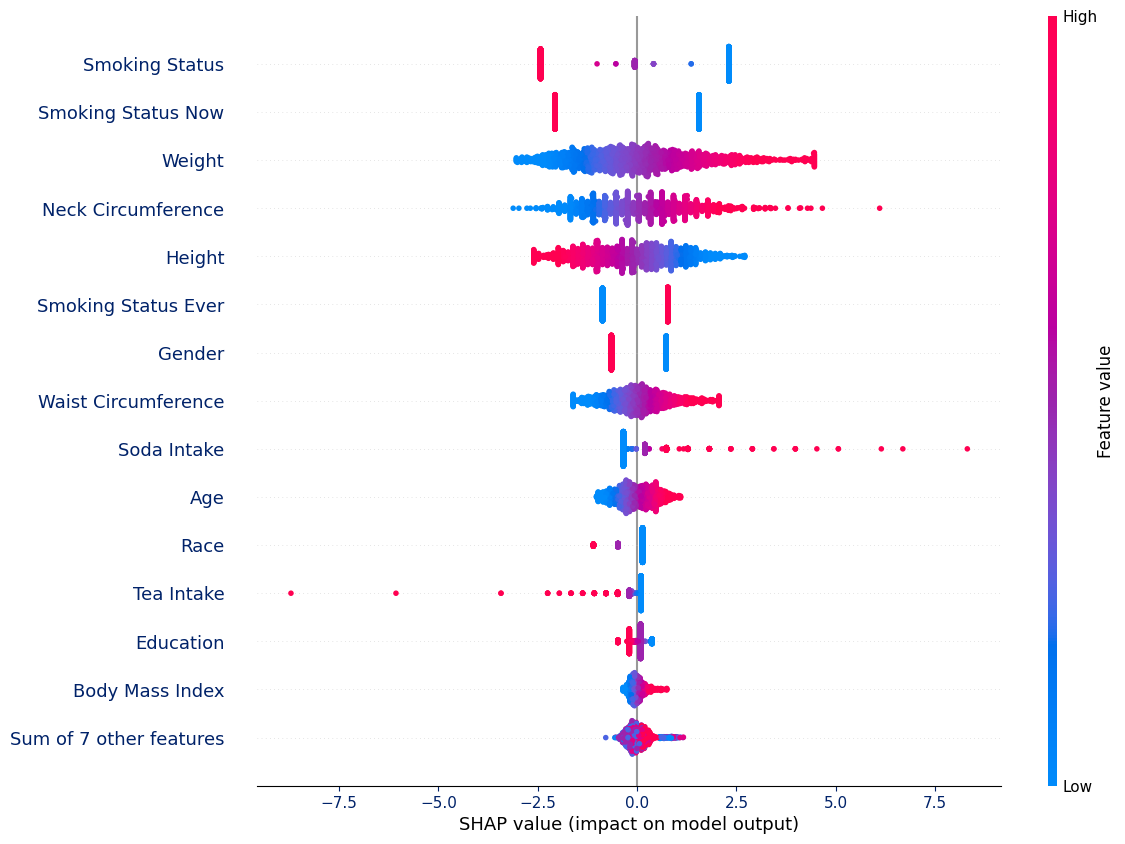

In [10]:
# make figure size bigger
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]

shap.plots.beeswarm(shap_values_test, max_display=15, axis_color='#002269', show=False, plot_size=(12, 10))

In [11]:
# save shap values use pickle
import pickle
import shap
# with open('./shap_values_ebm.pkl', 'wb') as f:
#     pickle.dump(shap_values_test, f)

# load shap values

with open('./shap_values_ebm.pkl', 'rb') as f:
    shap_values_test = pickle.load(f)

<Axes: xlabel='SHAP value (impact on model output)'>

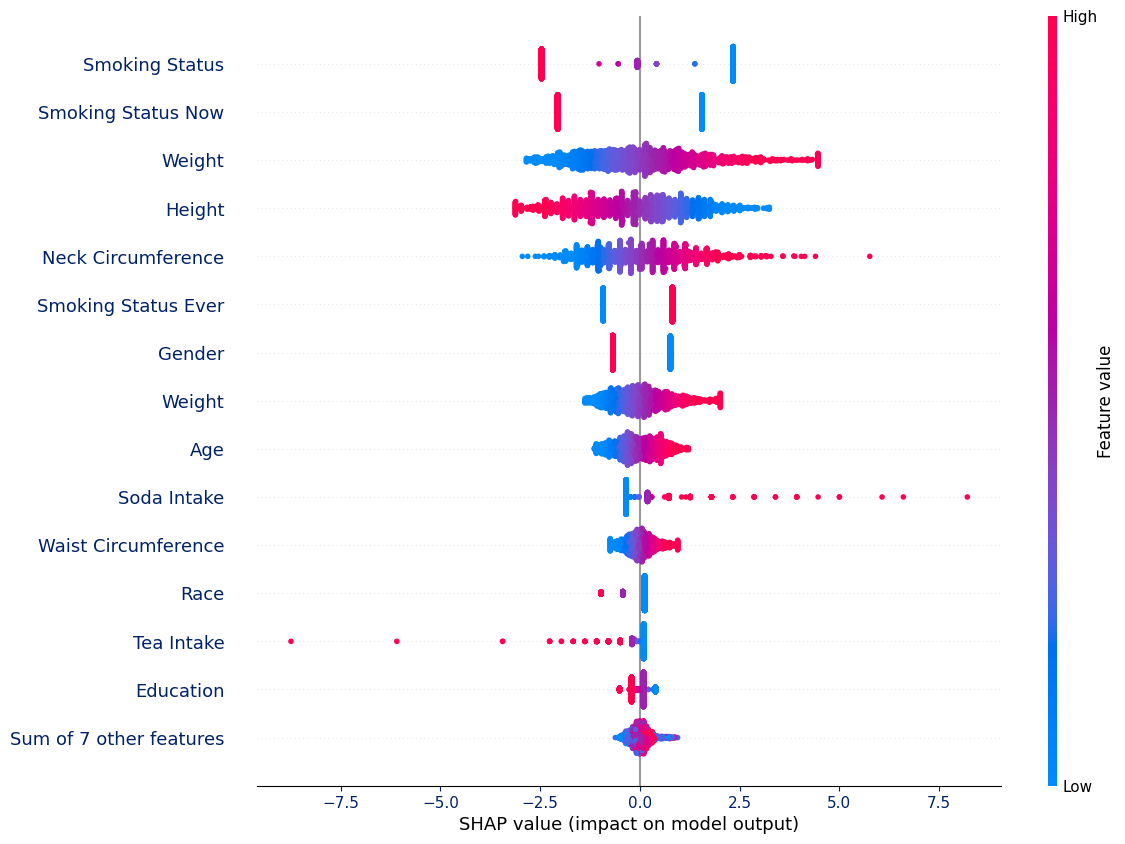

In [12]:
# make figure size bigger
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]

shap.plots.beeswarm(shap_values_test, max_display=15, axis_color='#002269', show=False, plot_size=(12, 10))